<a href="https://colab.research.google.com/github/Xavier-ML/ESTADISTICA-Xavier-ML/blob/main/BD_Lambayeque22_ENAHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#LABORATORIO INDIVIDUAL – MODULO 1 DE LA PLATAFORMA VIRTUAL
El presente laboratorio se ha realizado para que lo resuelvan en forma individual. Está basado en una investigación real respecto a la información de la Encuesta Nacional de Hogares del año 2022 (ENAHO).




*by Javier Quispe Tenorio*

### Para cada uno de los grupos, la información de respuesta debe remitirse en Word la parte textual analítica y en Excel.
El ámbito de aplicación de la intervención fue en la región Lambayeque. La población estimada en el año 2022, fue de 1 millón 338 mil habitantes (1,338,994), habitando en 289,969 viviendas, en los cuales se tomó una muestra de 1436 hogares para identificar los hogares. A continuación, se alcanza la Base de Datos con algunas variables de interés.
El laboratorio se ha dividido de la siguiente manera.
Se debe utilizar la Base de datos que se adjunta en el Excel para resolver las siguientes preguntas.
### Para cada una de las variables cuantitativas se pide lo siguiente:

*   Distribución de frecuencias
*    Histograma y polígono
*    La media aritmética
*    La mediana
*    La moda
*     La desviación media
*    La varianza
*    La desviación estándar
*      El coeficiente de variación
*     El coeficiente de asimetría
*    El coeficiente de apuntamiento

### Para cada una de las variables cualitativas se pide lo siguiente:

*    Histograma
*    Distribución de frecuencias
*    La moda


In [ ]:
import pandas as pd
import math

In [ ]:
datos = pd.read_excel("/content/BD_Lambayeque22.xlsx")

In [ ]:
datos.shape

(4944, 22)

In [ ]:
datos.dtypes

aÑo             int64
mes             int64
conglome        int64
vivienda        int64
hogar           int64
codperso        int64
ubigeo          int64
dominio        object
estrato        object
p207           object
p208a           int64
p301a          object
factor07      float64
p110           object
p1121          object
mieperho        int64
totmieho        int64
sg42          float64
gru11hd       float64
inghog2dp     float64
gashog1dp     float64
estrsocial     object
dtype: object

#### Variable cuantitativa a analizar ingreso neto per cápita (**inghog2dp**)

In [ ]:
inghog2dp = datos['inghog2dp']

In [ ]:
type(inghog2dp)

pandas.core.series.Series

In [ ]:
inghog2dp

0       1278.309652
1       1278.309652
2       1278.309652
3       1278.309652
4       1675.821777
           ...     
4939     896.100065
4940     896.100065
4941     716.241862
4942     716.241862
4943     716.241862
Name: inghog2dp, Length: 4944, dtype: float64

In [ ]:
inghog2dp.min()

56.92596435546875

In [ ]:
inghog2dp.max()

15779.4140625

In [ ]:
round(inghog2dp.max())

15779

In [ ]:
for i in range(13):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
def tabla_frecuencias_agrupadas(columna):
  """
  Crea una tabla de frecuencias agrupadas para una columna de un dataset.

  Args:
    columna: La columna del dataset para la que se desea crear la tabla de frecuencias.
    rango: El rango de los datos.
    amplitud: La amplitud de cada intervalo de clase.

  Returns:
    Una tabla de frecuencias agrupadas con las siguientes columnas:
      * Intervalo: El intervalo de clase.
      * Frecuencia absoluta: La cantidad de veces que aparece el intervalo.
      * Frecuencia relativa: La frecuencia absoluta dividida por el tamaño de la muestra.
      * Marca de clase: El valor medio del intervalo.
  """
  # Valor maximo de datos
  Vmax = columna.max()
  # Valor minimo de datos
  Vmin = math.floor(columna.min())
  # diferencia del valor maximo al minimo
  R = Vmax - Vmin
  # Número de filas de datos
  numero_filas = columna.shape[0]
  # Número de intervalos calculo de Sturges
  n = round(1 + 3.22*math.log10(numero_filas ))
  # Amplitud decimal
  A = math.floor(R/n)
  # Redondeo de la amplitud
  redon_A = math.ceil(R/n)
  # valor de la multiplicación de numero de intervalos y amplitud de redondeo
  R_prima = n*redon_A
  # Diferencia entre el valor decimal y valor teorico de R
  d = R_prima - R
  # Valor maximo + 1
  Vmax_prima = Vmax + 1
  lista_variables_iniciales = [n,Vmax,Vmin,R,numero_filas,A,redon_A,R_prima,d,Vmax_prima]
  print(lista_variables_iniciales)
  # Inicializamos la tabla de frecuencias.
  lista_limite_inferior = []
  lista_limite_superior = []
  lista_marca_clase = []
  lista_frecuencia_absoluta = []
  lista_frecuencia_acumulada = []
  lista_frecuencia_relativa = []
  lista_frecuencia_relativa_acumulada = []
  lista_frecuencia_porcentual = []

  li = Vmin
  ls = Vmin + A

  # Calculamos los intervalos de clase.
  # Si los intervalos de clase contienen números decimales, redondeamos la marca de clase al decimal más cercano.

  for i in range(n):
    lista_limite_inferior.append(li)
    lista_limite_superior.append(ls)
    lista_marca_clase.append(round((li + ls)/2))
    li = li + A
    ls = ls + A
  if lista_limite_superior[n-1] < Vmax:
    lista_limite_superior[n-1]=math.ceil(Vmax)
  print(lista_limite_inferior)
  print(lista_limite_superior)
  print(lista_marca_clase)

  # Calculamos la frecuencia absoluta de cada intervalo.

  for j in range(n):
    N = 0
    for i in range(numero_filas):
        if lista_limite_inferior[j]< columna[i] and columna[i] <= lista_limite_superior[j]:
            N = N + 1
    lista_frecuencia_absoluta.append(N)

  print(lista_frecuencia_absoluta)

  # Calculamos la frecuencia absoluta acumulada.
  x = 0
  for i in range(n):
    x = x + lista_frecuencia_absoluta[i]
    lista_frecuencia_acumulada.append(x)
  print(lista_frecuencia_acumulada)

  # Calculamos la frecuencia relativa de cada intervalo.
  for k in range(n):
    z = lista_frecuencia_absoluta[k]/numero_filas
    lista_frecuencia_relativa.append(z)
  print(lista_frecuencia_relativa)

  # Calculamos la frecuencia relativa acumulada.
  y = 0
  for i in range(n):
    y = y + lista_frecuencia_relativa[i]
    lista_frecuencia_relativa_acumulada.append(y)
  print(lista_frecuencia_relativa_acumulada)

  # Calculamos la frecuencia porcentual de cada intervalo.
  for j in range(n):
    lista_frecuencia_porcentual.append(lista_frecuencia_relativa[j]*100)
  print(lista_frecuencia_porcentual)

  diccionario_estadistico = {"Límite inferior":lista_limite_inferior,
    "Límite superior":lista_limite_superior,
    "Marca de clase":lista_marca_clase, "Frecuencia absoluta": lista_frecuencia_absoluta, "Frecuencia absoluta acumulada": lista_frecuencia_acumulada, "Frecuencia relativa": lista_frecuencia_relativa, "Frecuencia relativa acumulada": lista_frecuencia_relativa_acumulada, "Frecuencia porcentual %": lista_frecuencia_porcentual}
  print(diccionario_estadistico)

  tabla = pd.DataFrame(diccionario_estadistico)

  # Calculamos la frecuencia porcentual de cada intervalo.
  #tabla["Frecuencia porcentual"] = tabla["Frecuencia absoluta"] * 100

  return tabla


In [ ]:
dataset = pd.DataFrame({
  "Edad": [21, 25.3, 25.1, 19.4, 20.5, 22.6, 21.7, 24.8, 26.9]
})


In [ ]:
tabla = tabla_frecuencias_agrupadas(dataset["Edad"])

print(tabla)

[4, 26.9, 19, 7.899999999999999, 9, 1, 2, 8, 0.10000000000000142, 27.9]
[19, 20, 21, 22]
[20, 21, 22, 27]
[20, 20, 22, 22]
[1, 2, 1, 5]
[1, 3, 4, 9]
[0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.5555555555555556]
[0.1111111111111111, 0.3333333333333333, 0.4444444444444444, 1.0]
[11.11111111111111, 22.22222222222222, 11.11111111111111, 55.55555555555556]
{'Límite inferior': [19, 20, 21, 22], 'Límite superior': [20, 21, 22, 27], 'Marca de clase': [20, 20, 22, 22], 'Frecuencia absoluta': [1, 2, 1, 5], 'Frecuencia absoluta acumulada': [1, 3, 4, 9], 'Frecuencia relativa': [0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.5555555555555556], 'Frecuencia relativa acumulada': [0.1111111111111111, 0.3333333333333333, 0.4444444444444444, 1.0], 'Frecuencia porcentual %': [11.11111111111111, 22.22222222222222, 11.11111111111111, 55.55555555555556]}
   Límite inferior  Límite superior  Marca de clase  Frecuencia absoluta  \
0               19               20           

In [ ]:
dataset = pd.DataFrame({
  "Edad": [18.2, 25.3, 23.1, 19.4, 20.5, 22.6, 21.7, 24.8, 26.9]
})


In [ ]:

tabla = tabla_frecuencias_agrupadas(dataset["Edad"])

print(tabla)


[4, 26.9, 18, 8.899999999999999, 9, 2, 3, 12, 3.1000000000000014, 27.9]
[18, 20, 22, 24]
[20, 22, 24, 27]
[19, 21, 23, 25]
[2, 2, 2, 3]
[2, 4, 6, 9]
[0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333]
[0.2222222222222222, 0.4444444444444444, 0.6666666666666666, 1.0]
[22.22222222222222, 22.22222222222222, 22.22222222222222, 33.33333333333333]
{'Límite inferior': [18, 20, 22, 24], 'Límite superior': [20, 22, 24, 27], 'Marca de clase': [19, 21, 23, 25], 'Frecuencia absoluta': [2, 2, 2, 3], 'Frecuencia absoluta acumulada': [2, 4, 6, 9], 'Frecuencia relativa': [0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333], 'Frecuencia relativa acumulada': [0.2222222222222222, 0.4444444444444444, 0.6666666666666666, 1.0], 'Frecuencia porcentual %': [22.22222222222222, 22.22222222222222, 22.22222222222222, 33.33333333333333]}
   Límite inferior  Límite superior  Marca de clase  Frecuencia absoluta  \
0               18               20           

In [ ]:
tabla_frecuencias_inghog2dp = tabla_frecuencias_agrupadas(inghog2dp)
tabla_frecuencias_inghog2dp

[13, 15779.4140625, 56, 15723.4140625, 4944, 1209, 1210, 15730, 6.5859375, 15780.4140625]
[56, 1265, 2474, 3683, 4892, 6101, 7310, 8519, 9728, 10937, 12146, 13355, 14564]
[1265, 2474, 3683, 4892, 6101, 7310, 8519, 9728, 10937, 12146, 13355, 14564, 15780]
[660, 1870, 3078, 4288, 5496, 6706, 7914, 9124, 10332, 11542, 12750, 13960, 15168]
[3997, 748, 108, 31, 22, 23, 8, 0, 1, 2, 0, 0, 4]
[3997, 4745, 4853, 4884, 4906, 4929, 4937, 4937, 4938, 4940, 4940, 4940, 4944]
[0.8084546925566343, 0.15129449838187703, 0.021844660194174758, 0.006270226537216829, 0.004449838187702265, 0.00465210355987055, 0.0016181229773462784, 0.0, 0.0002022653721682848, 0.0004045307443365696, 0.0, 0.0, 0.0008090614886731392]
[0.8084546925566343, 0.9597491909385113, 0.981593851132686, 0.9878640776699029, 0.9923139158576052, 0.9969660194174758, 0.9985841423948221, 0.9985841423948221, 0.9987864077669903, 0.9991909385113269, 0.9991909385113269, 0.9991909385113269, 1.0]
[80.84546925566343, 15.129449838187703, 2.1844660194

,Límite inferior,Límite superior,Marca de clase,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada,Frecuencia porcentual %
0,56,1265,660,3997,3997,0.808455,0.808455,80.845469
1,1265,2474,1870,748,4745,0.151294,0.959749,15.129450
2,2474,3683,3078,108,4853,0.021845,0.981594,2.184466
3,3683,4892,4288,31,4884,0.006270,0.987864,0.627023
4,4892,6101,5496,22,4906,0.004450,0.992314,0.444984
5,6101,7310,6706,23,4929,0.004652,0.996966,0.465210
6,7310,8519,7914,8,4937,0.001618,0.998584,0.161812
7,8519,9728,9124,0,4937,0.000000,0.998584,0.000000
8,9728,10937,10332,1,4938,0.000202,0.998786,0.020227
9,10937,12146,11542,2,4940,0.000405,0.999191,0.040453


## Distribución de frecuencias

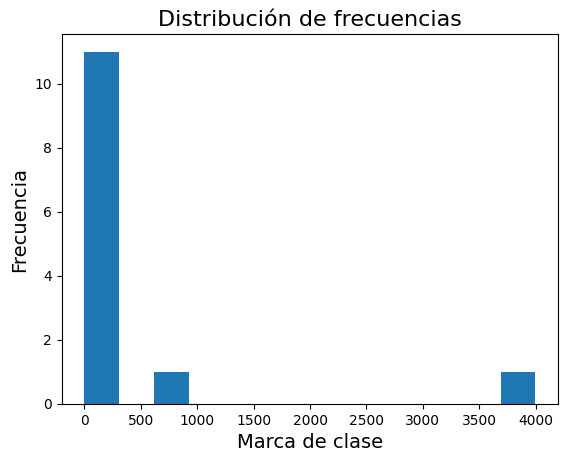

In [ ]:
import matplotlib.pyplot as plt

# Gráfico
plt.hist(tabla_frecuencias_inghog2dp['Frecuencia absoluta'], bins=len(tabla_frecuencias_inghog2dp['Marca de clase']), label="Frecuencia")
plt.title("Distribución de frecuencias", fontsize=16)
plt.xlabel("Marca de clase", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.grid(False)

# Mostrar el gráfico
plt.show()


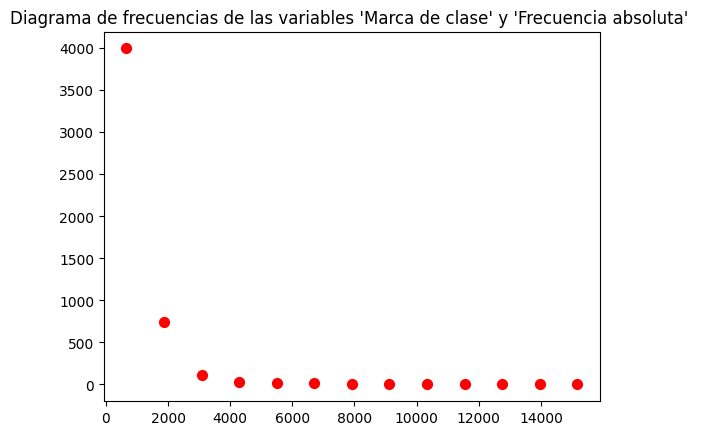

In [ ]:
plt.scatter(tabla_frecuencias_inghog2dp['Marca de clase'], tabla_frecuencias_inghog2dp['Frecuencia absoluta'], s=50, c="red")
plt.title("Diagrama de frecuencias de las variables 'Marca de clase' y 'Frecuencia absoluta' ")
plt.show()

In [2]:
# mateo vino hoy (comentario)

mateo vino hoy